
<br />
<center>
    <img src="images/image.png" width=1400 height=700 />
</center>


# Importing all the required dependencies

In [2]:
import matplotlib
import numpy as np
import pandas as pd
import nltk
import re
from nltk.book import *
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
import unicodedata
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob, Word
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB         # Naive Bayes
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


# Lead Actor Analysis

In [3]:
df = pd.read_csv('data/friends-dataset.csv', index_col=0)
df.head()

,Location,Scene,Season,Speaker,Text
0,Chandler and Joey's,Joey is repacking the furniture into boxes to...,4,Joey,What?
1,Monica and Rachel's,"the next morning, Monica is getting the door,",1,Monica,"Oh, you got the whole night, huh?"
2,Mike's apartment,His phone rings and he picks up,9,Chandler,"Phoebe is going to say ""yes""? That's, that's g..."
3,Monica and Rachel's,Ross and Monica are sitting on the couch play...,4,Ross,Yeah.
4,Phoebe’s birthday,she’s telling everyone what she found out at ...,7,Phoebe,Oh!



<br />
<center>
    <img src="images/tenor.gif" width=1000 height=700 />
</center>


# Can you guess who is the most talkative person in F.R.I.E.N.D.S?

Well here it is! Let's run this

In [3]:
"""Count the number of dialogues by per person in F.R.I.E.N.D.S """
dialogue_count = df['Speaker'].value_counts()

In [4]:
print(dialogue_count)

Rachel      17058
Ross        16672
Chandler    15389
Monica      15353
Joey        15235
Phoebe      13628
Name: Speaker, dtype: int64


In [5]:
"""Plot the bar graph with count"""
import matplotlib.pyplot as plt
dialogue_count.plot.bar(color=['green', 'blue', 'cyan', 'yellow', 'red', 'black'])
plt.title("Actor with most dialogue")
plt.ylabel('Dialogues')
plt.xlabel('Character')
plt.show()

<Figure size 640x480 with 1 Axes>

# Top Location  in the F.R.I.E.N.D.S

In [6]:
"""Find top most 6 locations in F.R.I.E.N.D.S """
n=6
count_location = df['Location'].value_counts()[:n]
print(count_location)

 Central Perk             16805
 Monica and Rachel's      15722
 Monica and Chandler's     5314
 Chandler and Joey's       3837
 Joey and Rachel's         3024
 Monica                    2558
Name: Location, dtype: int64


OK! Lets see actul number of locations

In [7]:
"""All locations in shooting"""
count_location1 = df['Location'].value_counts()
print(len(count_location1))

743



<br />
<center>
    <img src="images/perk.png" width=500 height=700 />
</center>


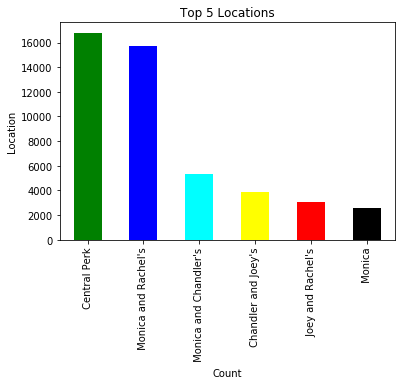

In [8]:
import matplotlib.pyplot as plt
count_location.plot.bar(color=['green', 'blue', 'cyan', 'yellow', 'red', 'black'])
plt.title("Top 5 Locations")
plt.ylabel('Location')
plt.xlabel('Count')
plt.show()

Ok! We know now who is talkative and where the series are shot! Let's move on to relation between two actors!

# Link Analysis

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-white')

In [10]:
num_seasons = 10
characters = ['Chandler', 'Joey', 'Monica', 'Phoebe','Rachel', 'Ross']
num_characters = len(characters)
mentions_file = 'transcripts_friends/friendsMentions.csv'

In [11]:
friends_mentions = pd.read_csv(mentions_file)
#friends_mentions.head()

Lets see which character mentions all the other characters in 10 seasons

In [12]:
def get_plot(speakerName, mentionedName):
    """Return the frequency number with bar graph of character mentioning the name of other character """
    
    data = friends_mentions.loc[(friends_mentions['speakerName']==speakerName)&(friends_mentions['mentionedName']==mentionedName)]
    sns.barplot(x = 'seasonNumber', y = 'mentions', data = data)#, color = '#6000df')
    sns.despine()
    ax = plt.gca()
    ax.set_xlabel('Season', fontsize = 12)
    ax.set_ylabel('Mentions', fontsize = 12)
    ax.set_title('{}: {}'.format(speakerName, mentionedName), fontsize = 14)
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., p.get_height()+1, '%d' % int(p.get_height()), fontsize=12, ha='center', va='bottom')
    plt.show()


<br />
<center>
    <img src="images/00233601_7a717bd_sf_sqcopy.jpg" width=700 height=40 />
</center>


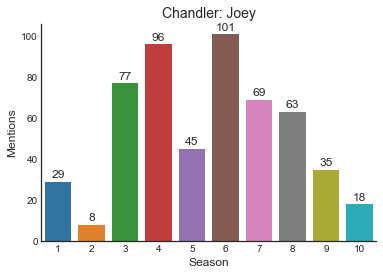

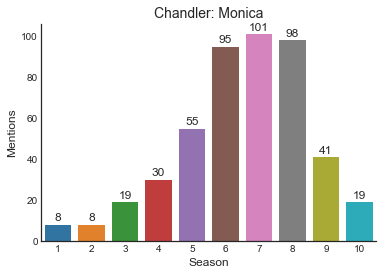

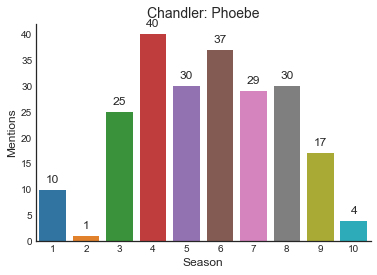

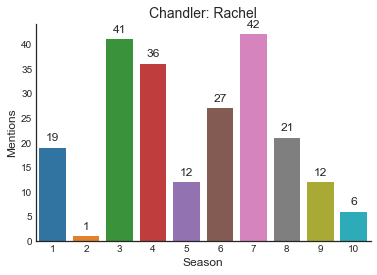

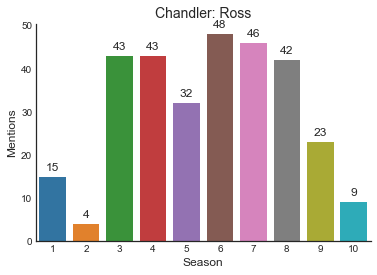

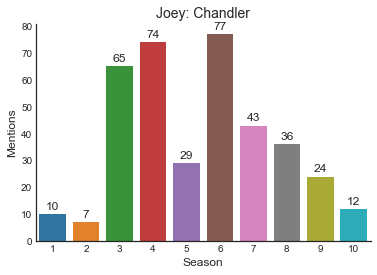

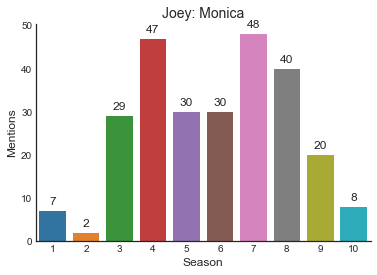

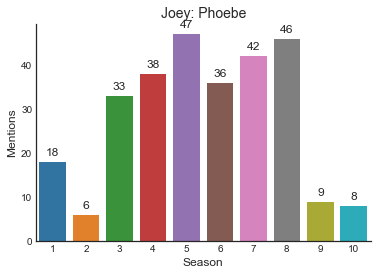

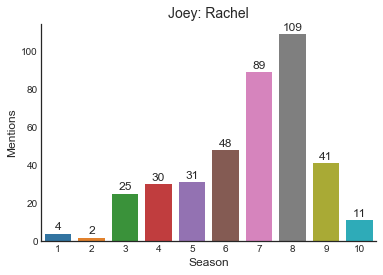

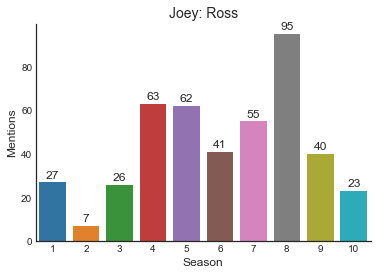

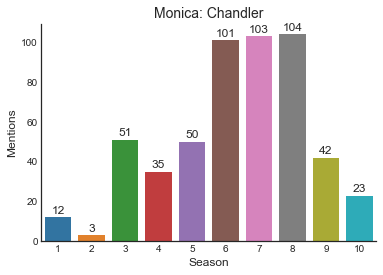

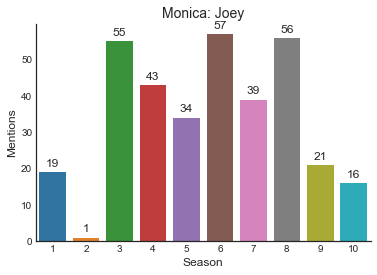

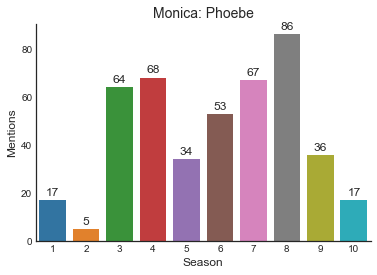

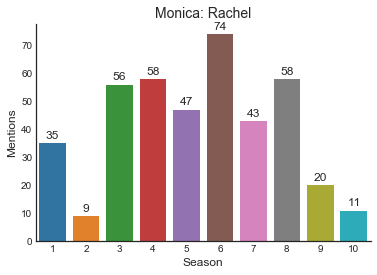

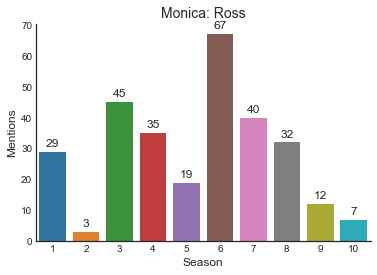

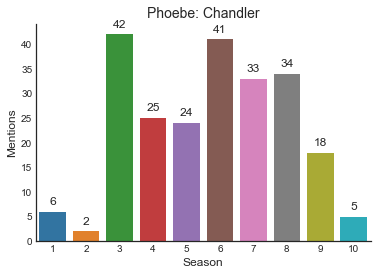

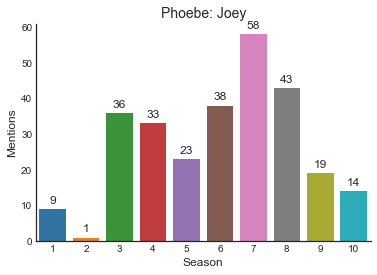

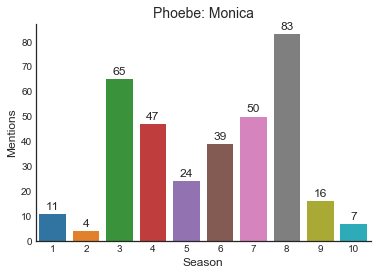

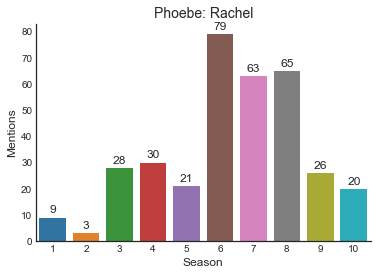

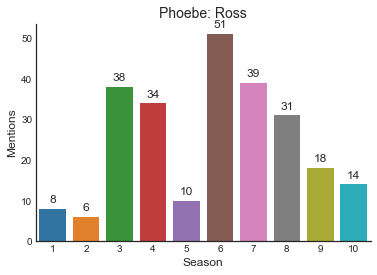

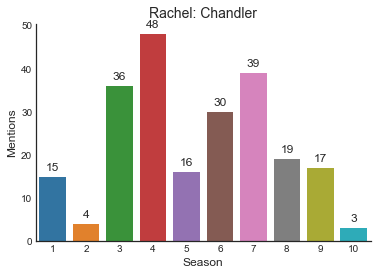

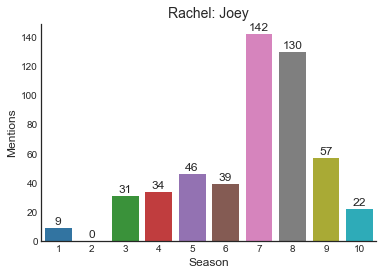

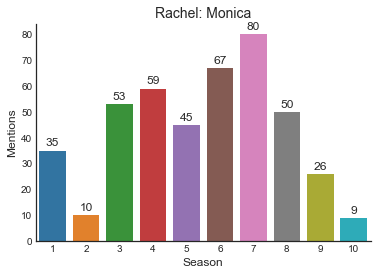

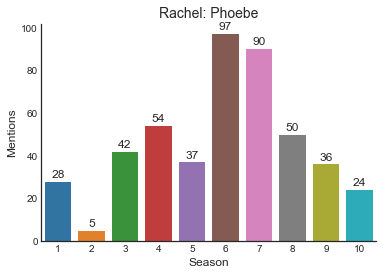

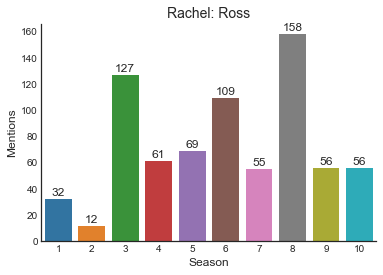

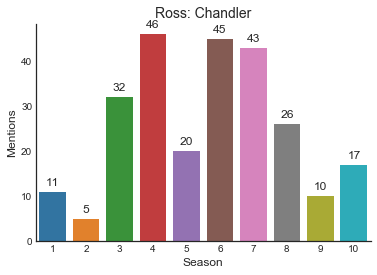

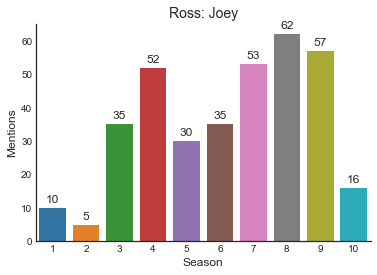

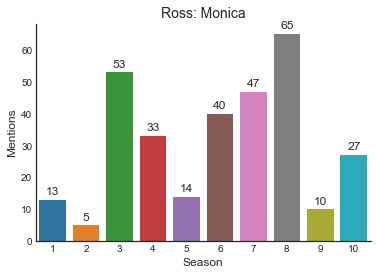

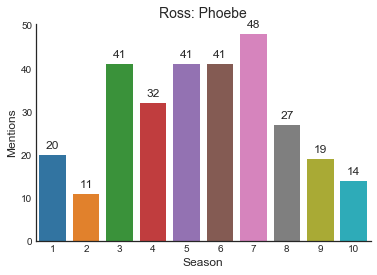

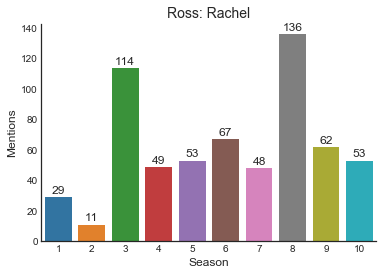

In [13]:
"""Lets call the fuction and see how many times, lets say Chandler has called Joey"""

#loop through the character list 
for speakerName in characters: 
    #loop through the mentioned name
    for mentionedName in characters:
        #Skip the self call 
        if speakerName == mentionedName:
            continue
        else:
            #get a plot of speaker and reffered name by the speaker
            get_plot(speakerName, mentionedName)

# Shall we count it?

In [14]:
data = friends_mentions.loc[(friends_mentions['speakerName']==speakerName)&(friends_mentions['mentionedName']==mentionedName)]

In [15]:
list(data.mentions)

[]

In [16]:
#plt.style.available

In [17]:
"""Lets count numeric values of the mentioned name"""
friends_mentions.groupby('mentionedName').mentions.sum()

mentionedName
Chandler    1613
Joey        2021
Monica      1822
Phoebe      1710
Rachel      1984
Ross        2017
Name: mentions, dtype: int64

In [18]:
"""Lets count numeric values of the speaker name"""
friends_mentions.groupby('speakerName').mentions.sum()

speakerName
Chandler    1760
Joey        1750
Monica      2012
Phoebe      1443
Rachel      2369
Ross        1833
Name: mentions, dtype: int64

Lets move on to next part

<br />
<center>
    <img src="images/next.jpg" width=700 height=40 />
</center>
